In [40]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as ppl
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score
%matplotlib inline

In [2]:
data = pd.read_csv('songs.csv')
data

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3
...,...,...,...,...,...,...,...,...,...,...
355,just-like-that,2006,abba,Pop,Until that day\nMy life had been a river\nFoll...,972,2,0,0,1
356,ring-ring,1995,abba,Pop,I was sitting by the phone\nI was waiting all ...,1283,33,0,0,3
357,reina-danzante,1981,abba,Pop,You can dance\nYou can jive\nHaving the time o...,810,1,0,0,0
358,code-of-the-streets,2006,gangstarr,Hip-Hop,Take this for example young brothers want rep\...,1996,34,0,0,5


In [6]:
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, ['length', 'commas', 'exclamations', 'colons', 'hyphens']], data.artist, test_size=0.33, random_state=42)

In [36]:
ranging = range(0, 43)
results = pd.Series(index=list(ranging))

for i in ranging:
    choser = tree.DecisionTreeClassifier(criterion='entropy', max_depth=16, random_state=20)
    choser.fit(X=X_train, y=y_train)
    results.loc[i] = cross_val_score(choser, X_test, y_test, cv=5).mean()

C:\Users\Ivan Demkov\AppData\Local\Temp\ipykernel_14968\3967366423.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  results = pd.Series(index=list(ranging))


<Axes: >

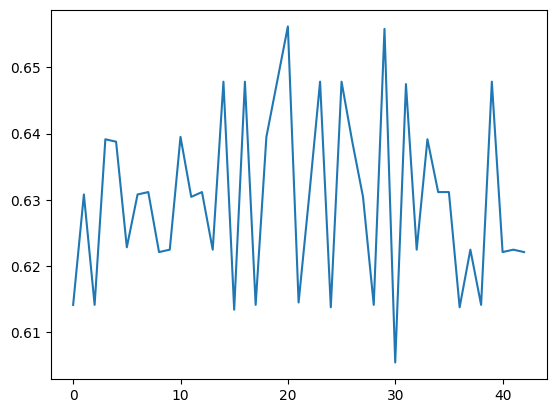

In [37]:
sns.lineplot(results, x=ranging, y=results)

In [38]:
results.idxmax()

20

In [39]:
choser = tree.DecisionTreeClassifier(criterion='entropy', max_depth=16, random_state=20)
choser.fit(X=X_train, y=y_train)
cross_val_score(choser, X_test, y_test, cv=5).mean()

0.6561594202898551

In [43]:
precision_score(y_test, choser.predict(X_test), average='micro')

0.6890756302521008

In [44]:
recall_score(y_test, choser.predict(X_test), average='micro')

0.6890756302521008